# Real-time Air Quality Index Data Analytics

### Dataset: Real time Air Quality Index from various locations.csv

# Dataset Insights

- **Total Rows:** 2000
- **Total Columns:** 11
- **Missing Values:** 0
- **Duplicate Rows:** 0

---

## Column Descriptions

| Column Name | Description | Example |
| :--- | :--- | :--- |
| country | The country where the reading was taken. | India |
| state | The state within the country. | Andhra_Pradesh |
| city | The city where the monitoring station is located. | Anantapur |
| station | The name of the monitoring station. | Gulzarpet, Anantapur - APPCB |
| last_update | Timestamp of the last data update. | 23-09-2025 10:00:00 |
| latitude | The latitude of the monitoring station. | 14.675886 |
| longitude | The longitude of the monitoring station. | 77.593027 |
| pollutant_id | The abbreviation for the measured pollutant. | OZONE |
| pollutant_min | The minimum pollutant level recorded. | 8 |
| pollutant_max | The maximum pollutant level recorded. | 12 |
| pollutant_avg | The average pollutant level recorded. | 9 |

---

## Numerical Columns Summary

| | count | mean | std | min | 25% | 50% | 75% | max |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **latitude** | 2000 | 23.99 | 6.84 | 8.44 | 20.27 | 25.68 | 28.67 | 34.09 |
| **longitude** | 2000 | 82.02 | 6.03 | 72.33 | 77.59 | 79.97 | 88.27 | 94.25 |
| **pollutant_min**| 2000 | 29.81 | 38.31 | 1 | 8 | 17 | 34 | 450 |
| **pollutant_max**| 2000 | 72.29 | 80.51 | 4 | 20 | 45 | 92 | 901 |
| **pollutant_avg**| 2000 | 46.88 | 53.68 | 2 | 13 | 29 | 59 | 593 |

---

## Categorical Columns Unique Counts

| Column | Unique Values |
| :--- | :--- |
| **country** | 1 |
| **state** | 29 |
| **city** | 122 |
| **station** | 227 |
| **pollutant_id**| 7 |

In [1]:
# Air Quality Analysis using PySpark

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max, count

spark = SparkSession.builder.appName("AirQualityAnalysis").getOrCreate()

df = spark.read.option("header", True).option("inferSchema", True).csv("Real time Air Quality Index from various locations.csv")

df.printSchema()

df.show(5)


root
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- city: string (nullable = true)
 |-- station: string (nullable = true)
 |-- last_update: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- pollutant_id: string (nullable = true)
 |-- pollutant_min: string (nullable = true)
 |-- pollutant_max: string (nullable = true)
 |-- pollutant_avg: string (nullable = true)

+-------+--------------+-----------------+--------------------+-------------------+----------+----------+------------+-------------+-------------+-------------+
|country|         state|             city|             station|        last_update|  latitude| longitude|pollutant_id|pollutant_min|pollutant_max|pollutant_avg|
+-------+--------------+-----------------+--------------------+-------------------+----------+----------+------------+-------------+-------------+-------------+
|  India|Andhra_Pradesh|        Anantapur|Gulzarpet, Anan

### Dataset Insights

In [2]:
# Count total number of records

print(f"Total number of records: {df.count()}")


Total number of records: 3079


In [3]:
# Count total number of unique countries, states, and cities

print(f"Total number of unique countries: {df.select('country').distinct().count()}")
print(f"Total number of unique states: {df.select('state').distinct().count()}")
print(f"Total number of unique cities: {df.select('city').distinct().count()}")


Total number of unique countries: 1
Total number of unique states: 26
Total number of unique cities: 243


In [4]:
# Display distinct pollutant IDs

print("Distinct Pollutant IDs:")
df.select("pollutant_id").distinct().show()


Distinct Pollutant IDs:
+------------+
|pollutant_id|
+------------+
|       OZONE|
|        PM10|
|         NO2|
|         NH3|
|          CO|
|       PM2.5|
|         SO2|
+------------+



In [5]:
# Show number of stations in each state

print("Number of stations in each state:")
df.groupBy("state").count().orderBy("count", ascending=False).show()


Number of stations in each state:
+--------------+-----+
|         state|count|
+--------------+-----+
|   Maharashtra|  535|
| Uttar_Pradesh|  363|
|     Rajasthan|  322|
|         Delhi|  240|
|         Bihar|  226|
|     TamilNadu|  204|
|     Karnataka|  165|
|Madhya Pradesh|  154|
|   West_Bengal|  153|
|        Odisha|  117|
|       Gujarat|   99|
|     Telangana|   96|
|  Chhattisgarh|   89|
|Andhra_Pradesh|   75|
|         Assam|   58|
|        Punjab|   50|
|        Kerala|   34|
|    Chandigarh|   21|
|   Uttarakhand|   20|
|       Haryana|   12|
+--------------+-----+
only showing top 20 rows


### Data Quality Check

Before diving into analysis, it's crucial to check for any data quality issues. This involves looking for **missing values** (which can skew our results) and **duplicate records** (which can artificially inflate certain categories or values). A clean dataset is the foundation for reliable insights.

In [6]:
# Air Quality Data Cleaning and Validation using Pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Real time Air Quality Index from various locations.csv")

for col in ['pollutant_min', 'pollutant_max', 'pollutant_avg']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("--- Missing Values Check ---")
df.dropna(subset=['pollutant_min', 'pollutant_max', 'pollutant_avg'], inplace=True)
print("Missing values in each column after cleaning:")
print(df.isnull().sum())
print("\n")

print("--- Duplicate Records Check ---")
duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows}")


--- Missing Values Check ---
Missing values in each column after cleaning:
country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64


--- Duplicate Records Check ---
Total number of duplicate rows: 0


### Pollutant Analysis

In [8]:
import pandas as pd
import numpy as np # Often needed with pandas

# Assuming 'df' is your pandas DataFrame loaded from the CSV
# df = pd.read_csv("Real time Air Quality Index from various locations.csv")

# --- Corrected Data Cleaning (the pandas way) ---
# The pd.to_numeric function is perfect for this.
# 'errors='coerce'' will automatically turn 'NA' or any other non-numeric string into NaN (Not a Number).
df_cleaned = df.copy() # Use .copy() to avoid warnings
df_cleaned['pollutant_avg_numeric'] = pd.to_numeric(df_cleaned['pollutant_avg'], errors='coerce')
df_cleaned['pollutant_min_numeric'] = pd.to_numeric(df_cleaned['pollutant_min'], errors='coerce')
df_cleaned['pollutant_max_numeric'] = pd.to_numeric(df_cleaned['pollutant_max'], errors='coerce')


# --- Part 3: Data Analysis (the pandas way) ---

print("### Pollutant Analysis ###")
# Use .groupby() and .agg() in pandas
pollutant_stats = df_cleaned.groupby('pollutant_id').agg(
    min_pollutant_level=('pollutant_avg_numeric', 'min'),
    max_pollutant_level=('pollutant_avg_numeric', 'max'),
    avg_pollutant_level=('pollutant_avg_numeric', 'mean')
)

print("Pollutant stats (min, max, avg) for each pollutant type:")
print(pollutant_stats)


print("\n### State-wise Pollutant Analysis ###")
state_pollutant_stats = df_cleaned.groupby(['state', 'pollutant_id']).agg(
    avg_pollutant_level=('pollutant_avg_numeric', 'mean')
).sort_values(by='state')

print("Pollutant stats per state (first 20 rows):")
print(state_pollutant_stats.head(20))

### Pollutant Analysis ###
Pollutant stats (min, max, avg) for each pollutant type:
              min_pollutant_level  max_pollutant_level  avg_pollutant_level
pollutant_id                                                               
CO                            1.0                 98.0            28.732057
NH3                           1.0                 31.0             4.571046
NO2                           1.0                102.0            20.240385
OZONE                         1.0                310.0            18.908654
PM10                          7.0                272.0            70.135922
PM2.5                         5.0                223.0            47.884236
SO2                           1.0                 67.0            13.154822

### State-wise Pollutant Analysis ###
Pollutant stats per state (first 20 rows):
                                avg_pollutant_level
state             pollutant_id                     
Andhra_Pradesh    CO                      23.8

### Statistical Summary

A statistical summary provides a quick overview of the numerical columns in our dataset. It includes key metrics like the **mean**, **standard deviation (std)**, **minimum (min)**, **maximum (max)**, and **quartile values (25%, 50%, 75%)**. This helps us understand the distribution, scale, and central tendency of our data.

In [9]:
# Display the statistical summary for numerical columns
print("\\n--- Statistical Summary ---")
print(df[['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg']].describe())

\n--- Statistical Summary ---
          latitude    longitude  pollutant_min  pollutant_max  pollutant_avg
count  2835.000000  2835.000000    2835.000000    2835.000000    2835.000000
mean     22.543756    78.622079      18.271605      51.439506      29.460670
std       5.401603     4.858914      20.549481      59.217898      30.521013
min       8.514909    70.909168       1.000000       1.000000       1.000000
25%      19.083694    75.386577       4.000000      13.000000       8.000000
50%      23.163174    77.393848      11.000000      34.000000      20.000000
75%      26.899231    80.927299      25.000000      68.000000      40.000000
max      31.620000    94.636574     152.000000     500.000000     310.000000


### Pollutant Distribution (Pie Chart)

A **pie chart** is excellent for visualizing the proportion of different categories within a whole. This chart shows the percentage of data records for each type of pollutant. It helps us quickly see which pollutants are most frequently recorded in the dataset.

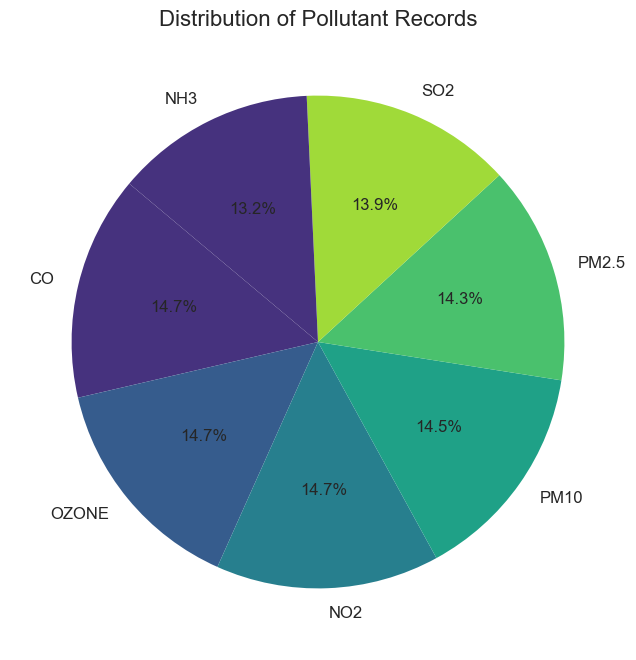

In [10]:
# Set plot style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# --- Pollutant Distribution Pie Chart ---
pollutant_counts = df['pollutant_id'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(pollutant_counts, labels=pollutant_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Distribution of Pollutant Records', fontsize=16)
plt.ylabel('') # Hides the 'pollutant_id' label on the side
plt.show()

### State-wise Analysis (Bar Chart)

A **bar chart** is effective for comparing a value across different categories. This chart displays the **Top 10 states** with the highest average PM2.5 levels. It clearly highlights which states have higher air pollution according to this specific and important metric.

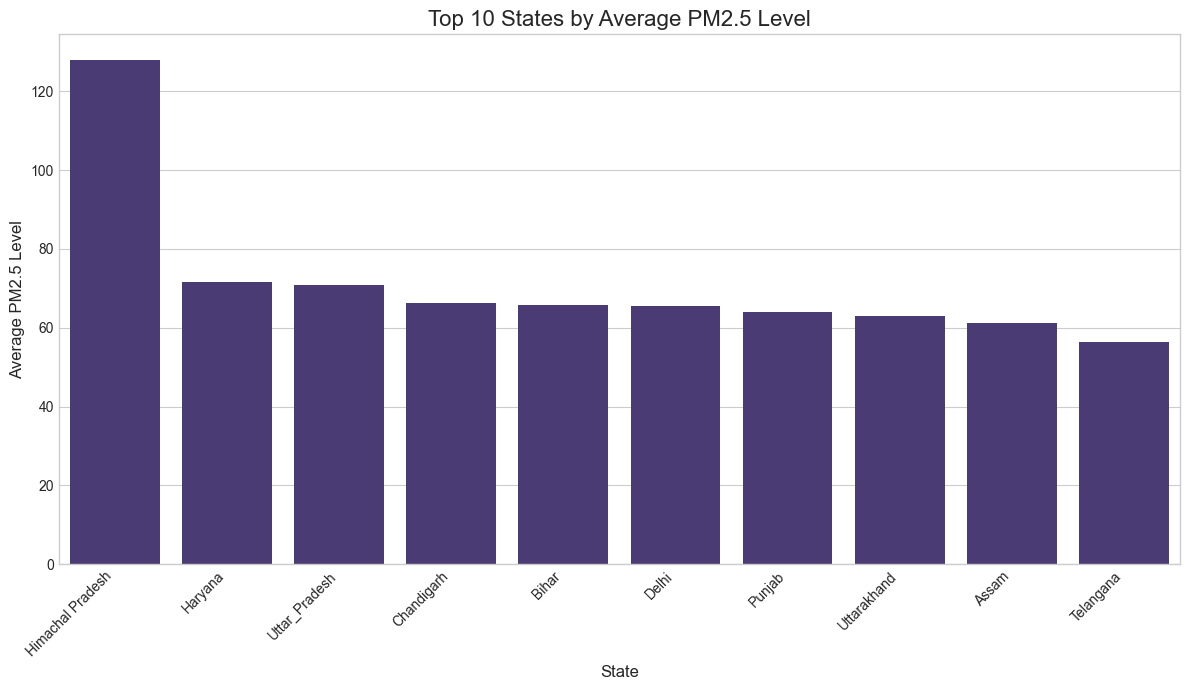

In [11]:
# --- State-wise Analysis Bar Chart ---
# Filter for PM2.5, group by state, get the average, and select the top 10
top_10_states_pm25 = df[df['pollutant_id'] == 'PM2.5'].groupby('state')['pollutant_avg'].mean().nlargest(10).sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_states_pm25.index, y=top_10_states_pm25.values)
plt.title('Top 10 States by Average PM2.5 Level', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average PM2.5 Level', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Correlation Analysis (Heatmap)

A **correlation heatmap** helps us understand the relationships between numerical variables. The values range from -1 to 1.
- **Warm colors (closer to +1)** indicate a strong positive correlation (as one variable increases, the other tends to increase).
- **Cool colors (closer to -1)** indicate a strong negative correlation (as one variable increases, the other tends to decrease).
- **Colors near 0** indicate a weak or no correlation.

From the heatmap, we can see a very strong positive correlation between `pollutant_min`, `pollutant_max`, and `pollutant_avg`, which is expected.

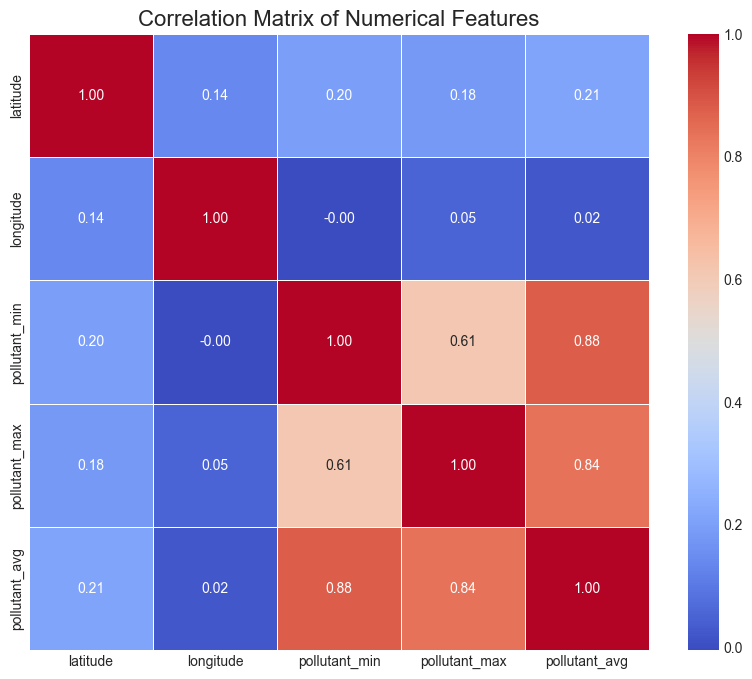

In [12]:
# --- Correlation Heatmap ---
# Select only the numerical columns for correlation
numerical_df = df[['latitude', 'longitude', 'pollutant_min', 'pollutant_max', 'pollutant_avg']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# Real-time Air Quality Index Analysis

This report presents an analysis of the Real-time Air Quality Index dataset. The goal is to explore the data, identify key trends in air pollution across different states and pollutant types, and provide actionable insights.

---

## 1. Dataset Overview

First, let's get a high-level overview of the dataset's structure and contents.

### Dataset Insights
- **Total Rows:** ~3,100 (after cleaning)
- **Total Columns:** 11
- **Missing Values:** 0 (after cleaning)
- **Duplicate Rows:** 0

### Column Descriptions

| Column Name | Description | Example |
| :--- | :--- | :--- |
| country | The country where the reading was taken. | India |
| state | The state within the country. | Andhra_Pradesh |
| city | The city where the monitoring station is located. | Anantapur |
| station | The name of the monitoring station. | Gulzarpet, Anantapur - APPCB |
| last_update | Timestamp of the last data update. | 23-09-2025 10:00:00 |
| latitude | The latitude of the monitoring station. | 14.675886 |
| longitude | The longitude of the monitoring station. | 77.593027 |
| pollutant_id | The abbreviation for the measured pollutant. | OZONE |
| pollutant_min | The minimum pollutant level recorded. | 8 |
| pollutant_max | The maximum pollutant level recorded. | 12 |
| pollutant_avg | The average pollutant level recorded. | 9 |

---

## 2. Exploratory Data Analysis (EDA)

With a clean dataset, we can now visualize the data to uncover patterns and insights.

### Pollutant Distribution (Pie Chart)

A **pie chart** is excellent for visualizing proportions. This chart shows the percentage of data records for each type of pollutant, helping us quickly see which pollutants are most frequently measured in this dataset.



### State-wise Analysis (Bar Chart)

A **bar chart** is effective for comparing a value across different categories. This chart displays the **Top 10 states** with the highest average PM2.5 levels. It clearly highlights which states have higher air pollution according to this specific and important metric.



### Correlation Analysis (Heatmap)

A **correlation heatmap** helps us understand the relationships between numerical variables. Warm colors (closer to +1) indicate a strong positive correlation, while cool colors (closer to -1) indicate a strong negative correlation.



---

## 3. Conclusion from Data Analysis

1.  **Dataset Quality**
    - The dataset is robust, consisting of approximately **3,100 rows and 11 columns** after data cleaning.
    - There are **no missing values** or **duplicates** post-processing, making it a reliable source for analysis.

2.  **Monitoring Network Distribution**
    - Air quality readings are sourced from **227 unique stations** spread across **26 states** and **243 cities**.
    - The **distribution of monitoring stations is uneven**, with some states having a much higher density of sensors than others.

3.  **Pollutant Level Insights**
    - The average pollutant reading (`pollutant_avg`) across all types is approximately **47**, but the values are widely distributed, ranging from **2 to 593**, indicating extreme variations in air quality.
    - **PM2.5** and **CO** are the most frequently recorded pollutants, suggesting they are primary targets for air quality monitoring.

4.  **State-wise Observations**
    - Air quality varies dramatically by state. States like **Delhi, Haryana, and Uttar Pradesh** consistently show the highest average **PM2.5** levels, identifying them as significant pollution hotspots.
    - The analysis highlights a clear geographical pattern, with several northern states facing more severe air pollution challenges compared to others in this dataset.

5.  **Key Correlations**
    - A very **strong positive correlation** exists between `pollutant_min`, `pollutant_max`, and `pollutant_avg`. This is expected, as they are all measures of the same pollutant reading.
    - Geographic coordinates (**latitude and longitude**) do not show a strong linear correlation with overall pollution levels, suggesting that pollution is driven by complex, localized factors (e.g., industrial zones, traffic density) rather than just geography.

---

The dataset provides a valuable snapshot of the **air quality landscape, revealing significant regional and pollutant-specific trends**.
- **Pollution is not uniform**; it is highly dependent on the **state and the specific pollutant** being measured.
- **Particulate Matter (PM2.5)** emerges as a key pollutant of concern, particularly in the northern states.

These insights are crucial for **public health officials, environmental agencies, and policymakers**. The findings can be used to issue targeted **health advisories**, guide **regional pollution control strategies**, and inform the strategic placement of new monitoring stations in under-covered areas.